# Benchmark event data generation

In [1]:
# possible configurations
parameters = {
    "mode": 3,  # control number of activities
    "min": 3,  # control number of activities
    "max": 3,  # control number of activities
    "sequence": 0.1,  # operators ->
    "choice": 0.1,  # operators X
    "parallel": 0.1,  # operators +
    "loop": 0.1,  # operators *
    "or": 0.5,  # operators O
    "silent": 0,  # probability of adding silent activities tau
    # "duplicate": 0, # probability of duplicating an activity (doesn't work)
    "lt_dependency": 0.2,  # probability to add a random dependency to the tree
    # "unfold": 0, # whether or not to unfold loops
    # "max_repeat": 10, # maximum number of repetitions of a loop
    "infrequent": 0.25,  # probability to make a choice have infrequent paths
    # "no_models": 1,
}

**Challenge**: possible operator probability permutations

In [2]:
permutation_list = [
    [1, 0, 0, 0, 0],
    [0.1, 0.225, 0.225, 0.225, 0.225],
    [0.3, 0.175, 0.175, 0.175, 0.175],
    [0.5, 0.125, 0.125, 0.125, 0.125],
    [0.7, 0.075, 0.075, 0.075, 0.075],
    [0.9, 0.025, 0.025, 0.025, 0.025],
    [0.5, 0.5, 0, 0, 0],
    [0.25, 0.25, 0.25, 0.25, 0],
    [0.15, 0.15, 0.233, 0.233, 0.233],
    [0.25, 0.25, 0.166, 0.166, 0.166],
    [0.35, 0.35, 0.1, 0.1, 0.1],
    [0.45, 0.45, 0.033, 0.033, 0.033],
    [0.1, 0.15, 0.2, 0.25, 0.3]
]

In [3]:
from itertools import permutations

set(permutations(permutation_list[0]))

{(0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0),
 (0, 1, 0, 0, 0),
 (1, 0, 0, 0, 0)}

In [4]:
n_traces = [100, 500, 1000]
n_activities = [4, 8, 16, 32, 64]
silent = [0, 1] # another discussion point

## Example of generated data

In [9]:
import os

pn_path = "../data/petri_net"
pt_path = "../data/process_tree"
ptml_path = "../data/ptml"
log_path = "../data/event_log"

print("Number of logs:", len(os.listdir(log_path)))

Number of logs: 0


In [1]:
from pm4py.objects.process_tree.importer import importer as ptml_importer

file_index = 1
file_path = f"{ptml_path}/{os.listdir(ptml_path)[file_index]}"

tree = ptml_importer.apply(file_path)
tree

NameError: name 'ptml_path' is not defined

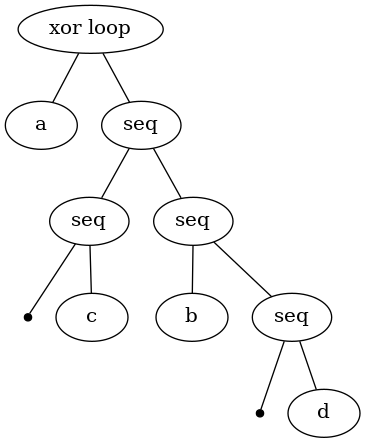

In [30]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

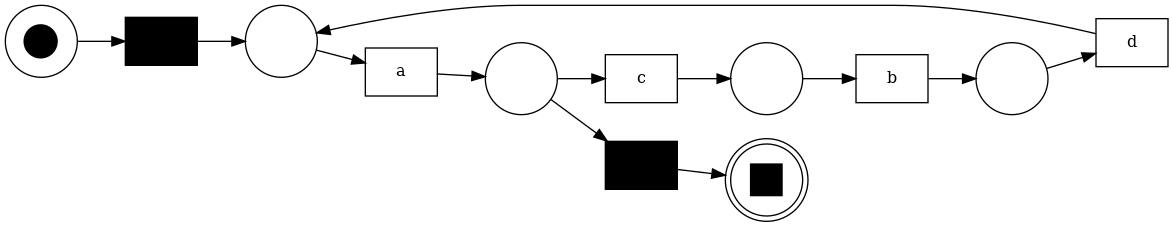

In [31]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter


gviz = pn_visualizer.apply(*pt_converter.apply(tree))
pn_visualizer.view(gviz)

## Feature extraction

In [77]:
import pandas as pd

df = pd.read_csv("../results/logs_c_features.csv")
#df = df.head(1000)
df.head()

log  n_traces  n_unique_traces   
0  100_4_0.1_0.1_0.1_0.35_0.35_0       100               22  \
1  100_4_0.1_0.1_0.1_0.35_0.35_1       100               43   
2  100_4_0.1_0.1_0.35_0.1_0.35_0       100                4   
3  100_4_0.1_0.1_0.35_0.1_0.35_1       100               23   
4  100_4_0.1_0.1_0.35_0.35_0.1_0       100               50   

   ratio_unique_traces_per_trace  trace_len_min  trace_len_max   
0                           0.22              2              4  \
1                           0.43              1              9   
2                           0.04              4              4   
3                           0.23              3              9   
4                           0.50              1             57   

   trace_len_mean  trace_len_median  trace_len_mode  trace_len_std  ...   
0            2.95               3.0               3       0.739932  ...  \
1            3.15               3.0               1       1.966596  ...   
2            4.00               4.0               4       0.000000  ...   
3            4.05               3.5               3       1.409787  ...   
4            8.90               5.5               1       9.247162  ...   

   end_activities_max  end_activities_mean  end_activities_median   
0                  31            25.000000                   27.0  \
1                  69            25.000000                   11.5   
2                  99            50.000000                   50.0   
3                  45            33.333333                   43.0   
4                 100           100.000000                  100.0   

   end_activities_std  end_activities_variance  end_activities_q1   
0            6.041523                36.500000              23.25  \
1           25.504901               650.500000               8.75   
2           49.000000              2401.000000              25.50   
3           15.107026               228.222222              27.50   
4            0.000000                 0.000000             100.00   

   end_activities_q3  end_activities_iqr  end_activities_skewness   
0              28.75                 5.5                -0.857082  \
1              27.75                19.0                 1.127784   
2              74.50                49.0                 0.000000   
3              44.00                16.5                -0.697823   
4             100.00                 0.0                      NaN   

   end_activities_kurtosis  
0                -0.864890  
1                -0.688886  
2                -2.000000  
3                -1.500000  
4                      NaN  

[5 rows x 80 columns]

## Feature distribution

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
ncols= 3
nrows= math.ceil(len(df.columns)/3)
fig, axes = plt.subplots(figsize=(10*ncols, 4*nrows), ncols=ncols, nrows=nrows)
fig.subplots_adjust(hspace=1)
axes = axes.ravel()

for i, feature in enumerate(df.columns[1:]):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])

## Visualizing feature space

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df.drop(['log'], axis=1))
imp_df = imp_mean.transform(df.drop(['log'], axis=1))
imp_df = pd.DataFrame(imp_df, columns = df.columns[1:])
print("Before:", len(df.loc[:, df.isna().any()].columns), "columns in", len(df.loc[:, df.isna().any()]), 'rows')
print("After:", len(imp_df.loc[:, imp_df.isna().any()].columns))

In [ ]:
from sklearn.preprocessing import StandardScaler

X = imp_df
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)
normed_X = Normalizer(norm="l2").fit_transform(X)


import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
norm_pca = PCA(n_components=2).fit(normed_X)


X_train_transformed = pca.transform(X)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)
X_train_norm_transformed = norm_pca.transform(normed_X)


first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component["with normalization"] = norm_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(30, 8)
)

_ = plt.tight_layout()


In [ ]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)

# Normalizer: By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. 
    # Unit norm with L2 means that if each element were squared and summed, the total would equal 1. 
    #Normalizer does transform all the features to values between -1 and 1. 
#norm_data = Normalizer(norm="l2").fit_transform(df.drop(["log"], axis=1))
norm_data = Normalizer(norm="l2").fit_transform(X)

#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
    #Unit variance means dividing all the values by the standard deviation.
scaler = StandardScaler()
sca_data = scaler.fit_transform(X)
#norm_data = Normalizer(norm="l2").fit_transform(norm_data)

sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24, 8))

X_new = pca.fit_transform(X)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax1, data=df_pca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax1.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax1.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_norm = pca.fit_transform(norm_data)
df_pca_norm = pd.DataFrame(X_new_norm, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax2, data=df_pca_norm, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax2.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax2.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")

X_new_sca = pca.fit_transform(sca_data)
df_pca_sca = pd.DataFrame(X_new_sca, columns=["PC1", "PC2"])
sns.scatterplot(ax=ax3, data=df_pca_sca, x="PC1", y="PC2", palette="bright", hue=[0]*len(df_pca), alpha=0.9, s=100)
ax3.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax3.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()
# plt.show()
# plt.close()

## Approach 1: Unsupervised Instance Selection

Goal: select top-n most representative event logs from the whole collection

This approach consists of clustering event logs using an algorithm that allow us to choose the number of clusters. Given *n* clusters, we select the instances closest to each cluster centroid.

0.3603738855572579


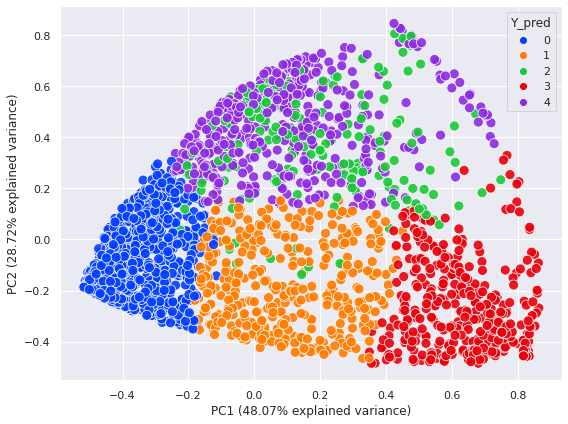

In [58]:
from sklearn.cluster import OPTICS, DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


clustering = KMeans(n_clusters=5, n_init="auto", random_state=5)
clustering.fit(norm_data)
df_pca = pd.DataFrame(X_new, columns=["PC1", "PC2"])
df_pca.insert(2, "Y_pred", clustering.labels_)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    ax=ax,
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Y_pred",
    palette="bright",
    alpha=0.9,
    s=100
)
ax.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
ax.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
plt.tight_layout()

print(silhouette_score(norm_data, clustering.labels_))

In [38]:
from collections import Counter

Counter(clustering.labels_)

Counter({2: 639, 0: 1034, 3: 434, 1: 399})

In [45]:
def plot_process_trees(files):
    for log in files:
        file_path = f"{ptml_path}/{log}.ptml"

        tree = ptml_importer.apply(file_path)
        gviz = pt_visualizer.apply(tree)
        pt_visualizer.view(gviz)

def plot_petri_nets(files):
    for log in selected_logs:
        file_path = f"{ptml_path}/{log}.ptml"

        tree = ptml_importer.apply(file_path)
        gviz = pn_visualizer.apply(*pt_converter.apply(tree))
        pn_visualizer.view(gviz)
        
def plot_selected_logs(df_original, df_pca_reduced, selected):
    df_ = df_original.copy()
    df_.insert(1, "selected", "no")    
    df_.iloc[sorted(selected), 1] = "yes"
    df_pca_reduced["selected"] = df_["selected"]

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(
        ax=ax,
        data=df_pca_reduced.sort_values(["selected"]),
        x="PC1",
        y="PC2",
        hue="selected",
        hue_order=["no", "yes"],
        style="selected",
        palette="bright",
        alpha=1,
        s=100
    )
    ax.set_xlabel(f"PC1 ({np.round(pca.explained_variance_ratio_[0]*100, 2)}% explained variance)")
    ax.set_ylabel(f"PC2 ({np.round(pca.explained_variance_ratio_[1]*100, 2)}% explained variance)")
    plt.tight_layout()

**TODO**

- Plot boxplots with highlighted logs
- Include real event logs in the PCA and see how close they are to the selected logs
- Think about a distance metric to maximize for clustering automation
- Multi-objective optimization:
    - maximize distance (Andrea's idea)
    - maximize number of cluster
    - maximize classification performance

In [46]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, distances = pairwise_distances_argmin_min(clustering.cluster_centers_, norm_data)
selected_logs = df.iloc[sorted(closest), 0]
df.iloc[sorted(closest), :]

log  tree_n_sequence  tree_n_choice  \
34     100_4_0.15_0.233_0.233_0.15_0.233_0                1              0   
388         100_16_0.25_0.25_0.25_0_0.25_0                2              3   
628   100_32_0.175_0.175_0.3_0.175_0.175_1               16             11   
1292  500_16_0.166_0.166_0.25_0.166_0.25_0                0              3   
1459  500_32_0.166_0.166_0.25_0.166_0.25_1               13              9   

      tree_n_parallel  tree_n_loop  tree_n_or  tree_n_silent  n_traces  \
34                  1            0          1              0       100   
388                 4            0          6              0        81   
628                24           10          9             39        91   
1292                5            2          5              0       494   
1459               11           12         17             31       398   

      n_unique_traces  ratio_unique_traces_per_trace  ...  entropy_lempel_ziv  \
34                 17                       0.170000  ...               0.584   
388                45                       0.555556  ...               2.248   
628                68                       0.747253  ...               2.457   
1292              143                       0.289474  ...               1.023   
1459              123                       0.309045  ...               1.576   

      entropy_k_block_diff_1  entropy_k_block_diff_3  entropy_k_block_diff_5  \
34                     1.042                   1.042                   1.042   
388                    3.821                   3.821                   3.821   
628                   -0.075                   1.865                   1.865   
1292                  -0.366                   1.255                   1.255   
1459                  -0.022                   3.892                   1.053   

      entropy_k_block_ratio_1  entropy_k_block_ratio_3  \
34                      1.902                    1.902   
388                     3.821                    3.821   
628                     3.407                    3.407   
1292                    3.273                    3.273   
1459                    3.892                    3.892   

      entropy_k_block_ratio_5  entropy_knn_3  entropy_knn_5  entropy_knn_7  
34                      1.902          1.642          1.160          0.960  
388                     3.821          2.835          2.448          2.212  
628                     3.407          3.154          2.766          2.478  
1292                    3.273          3.665          3.243          2.997  
1459                    3.892          3.651          3.249          2.991  

[5 rows x 100 columns]

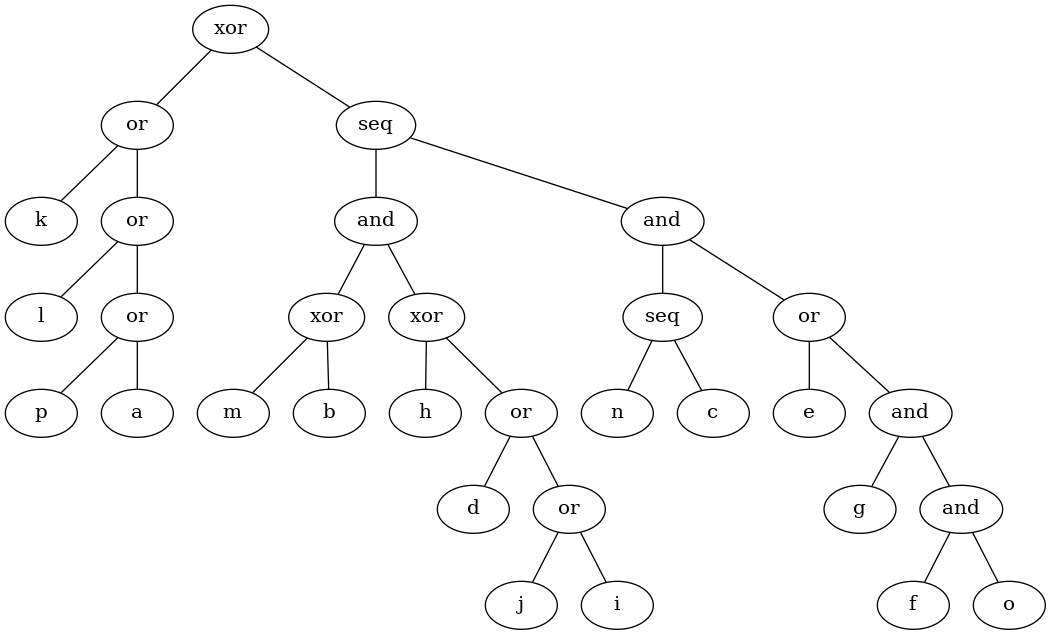

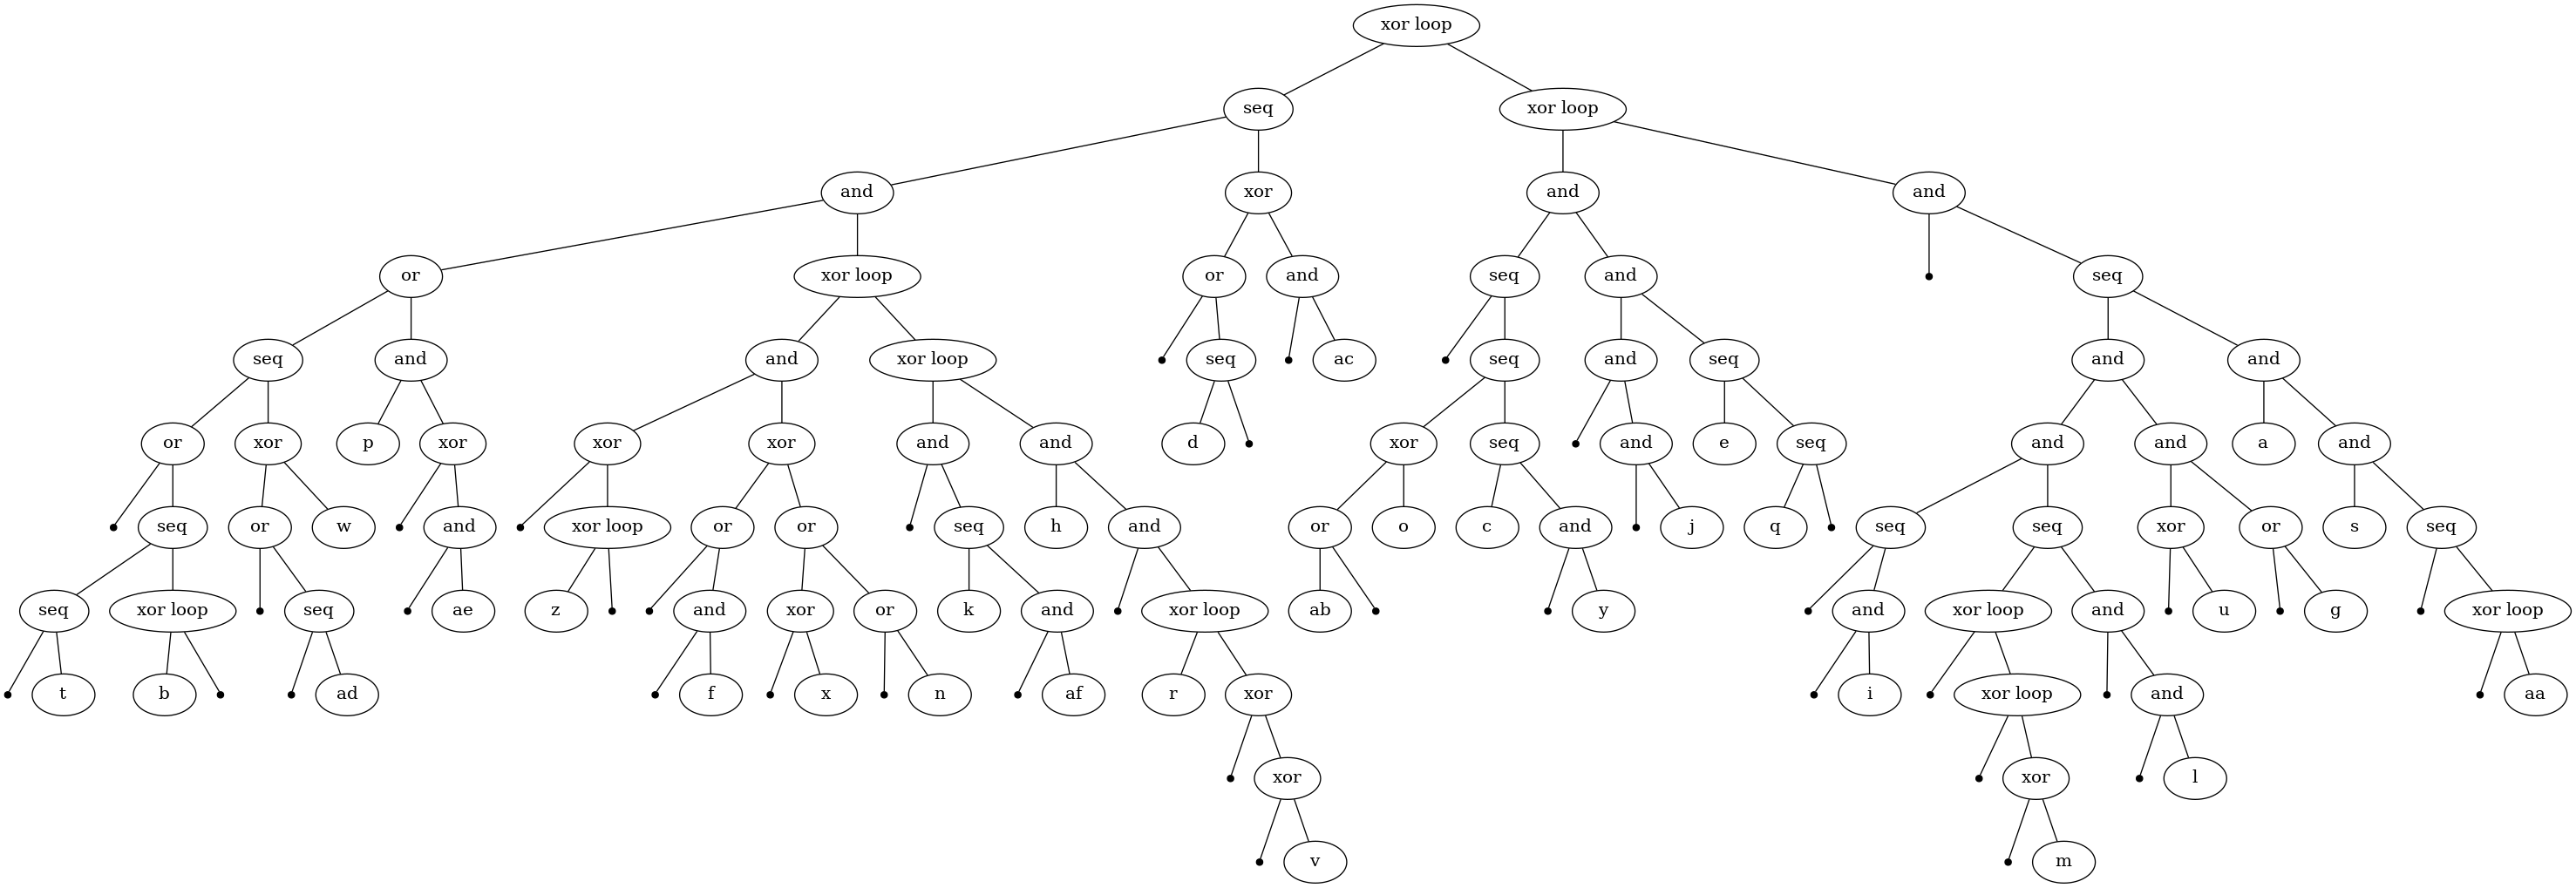

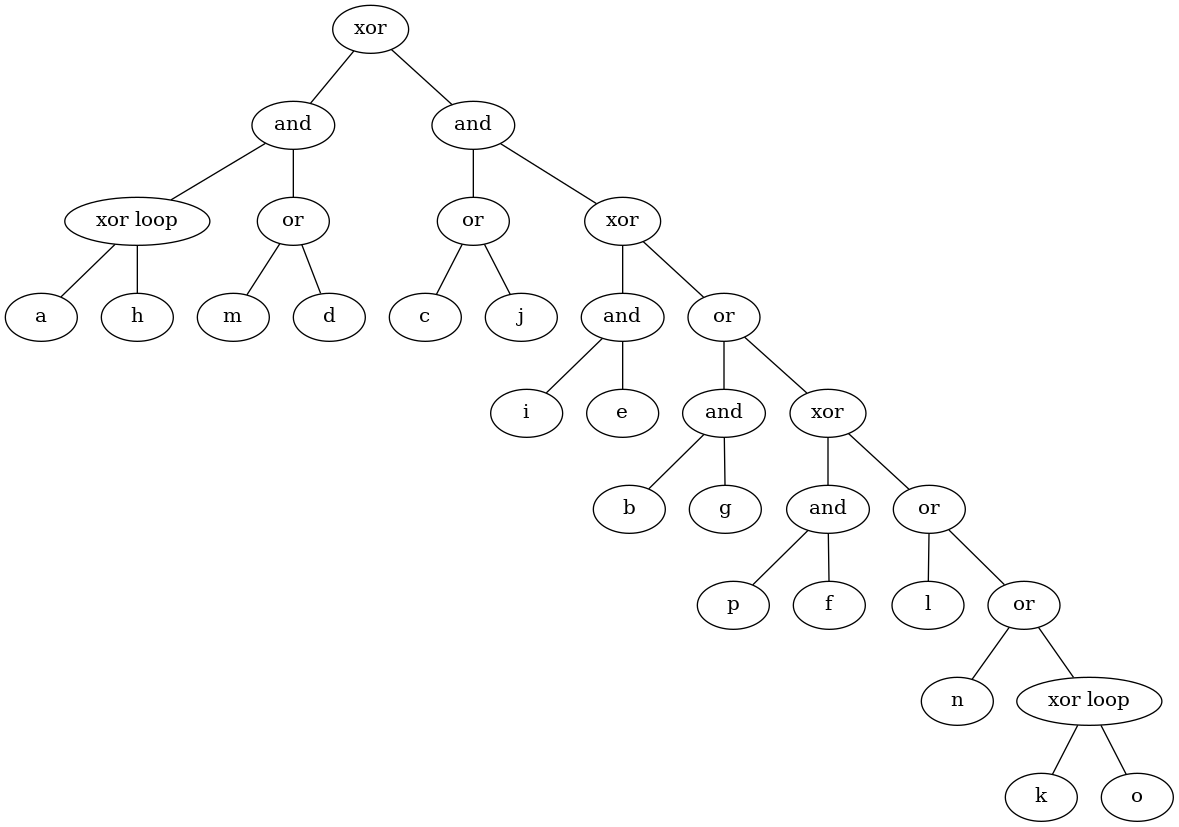

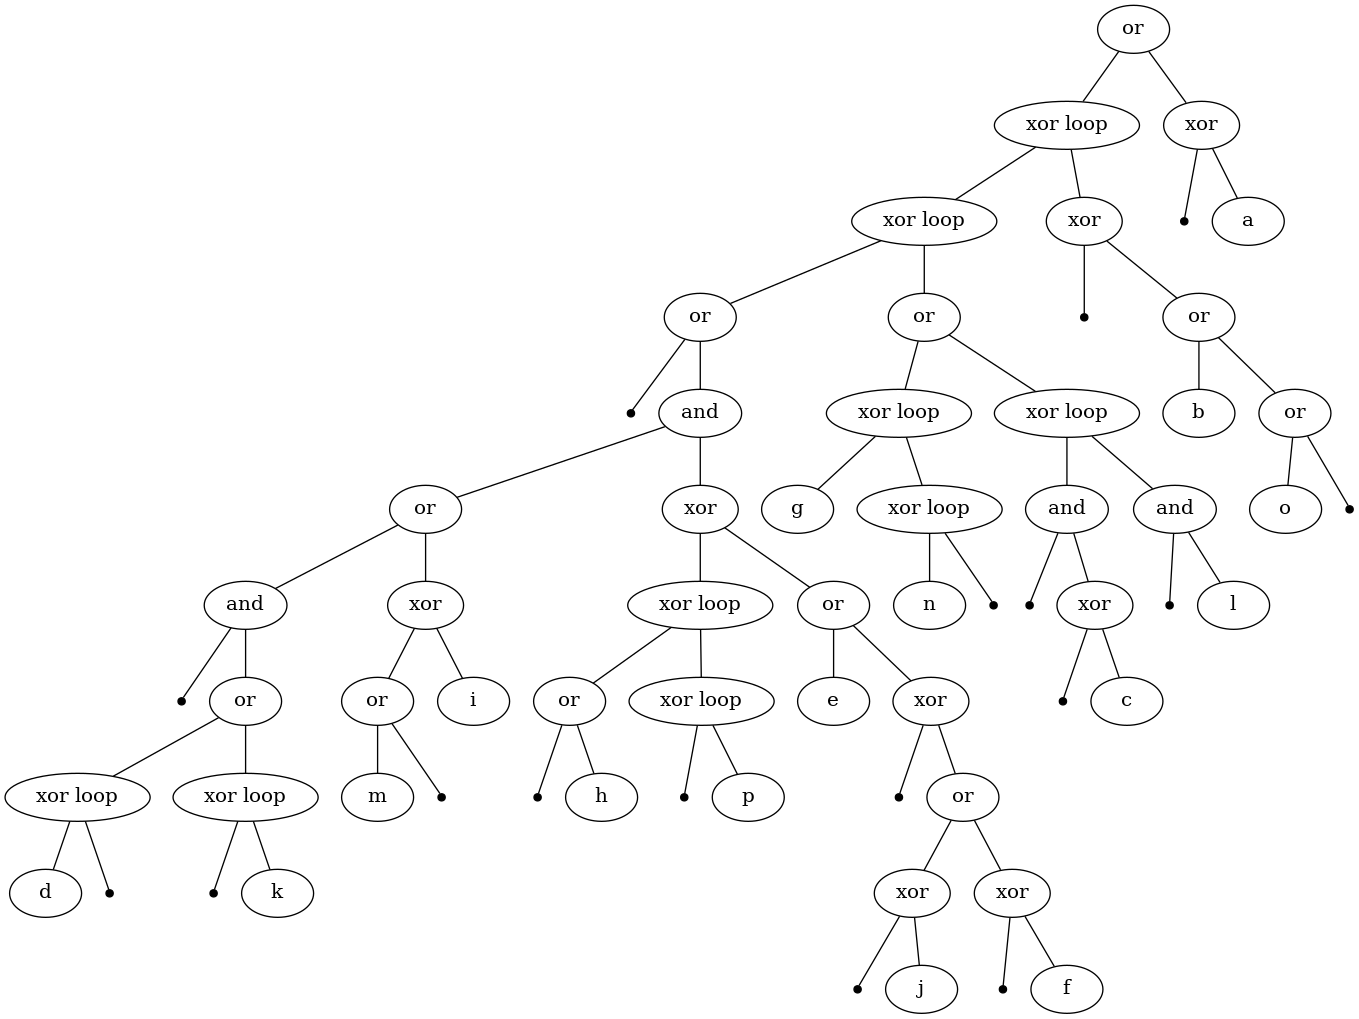

In [35]:
plot_process_trees(selected_logs)

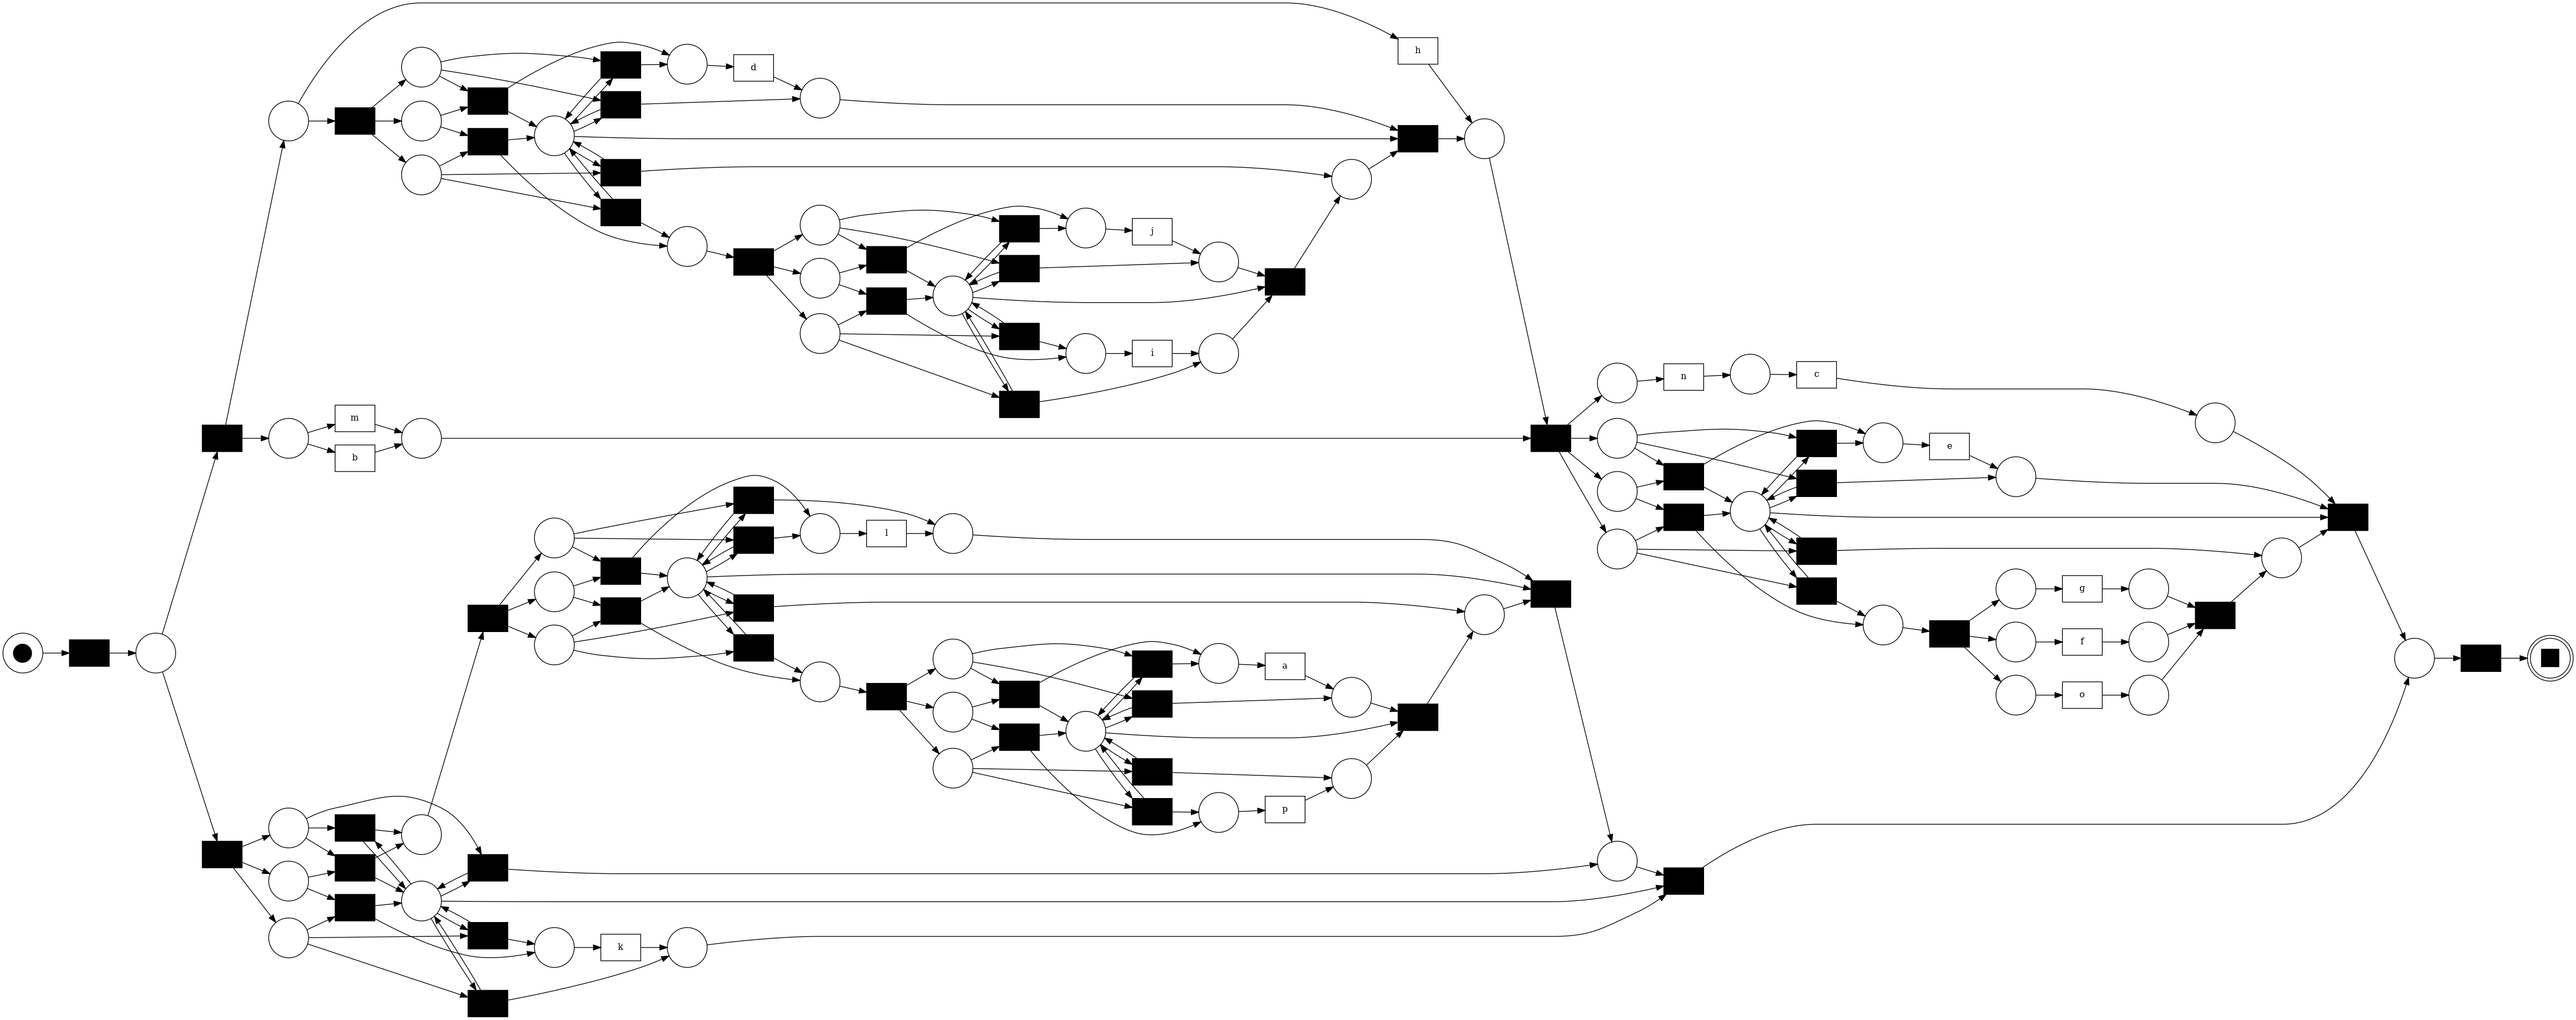

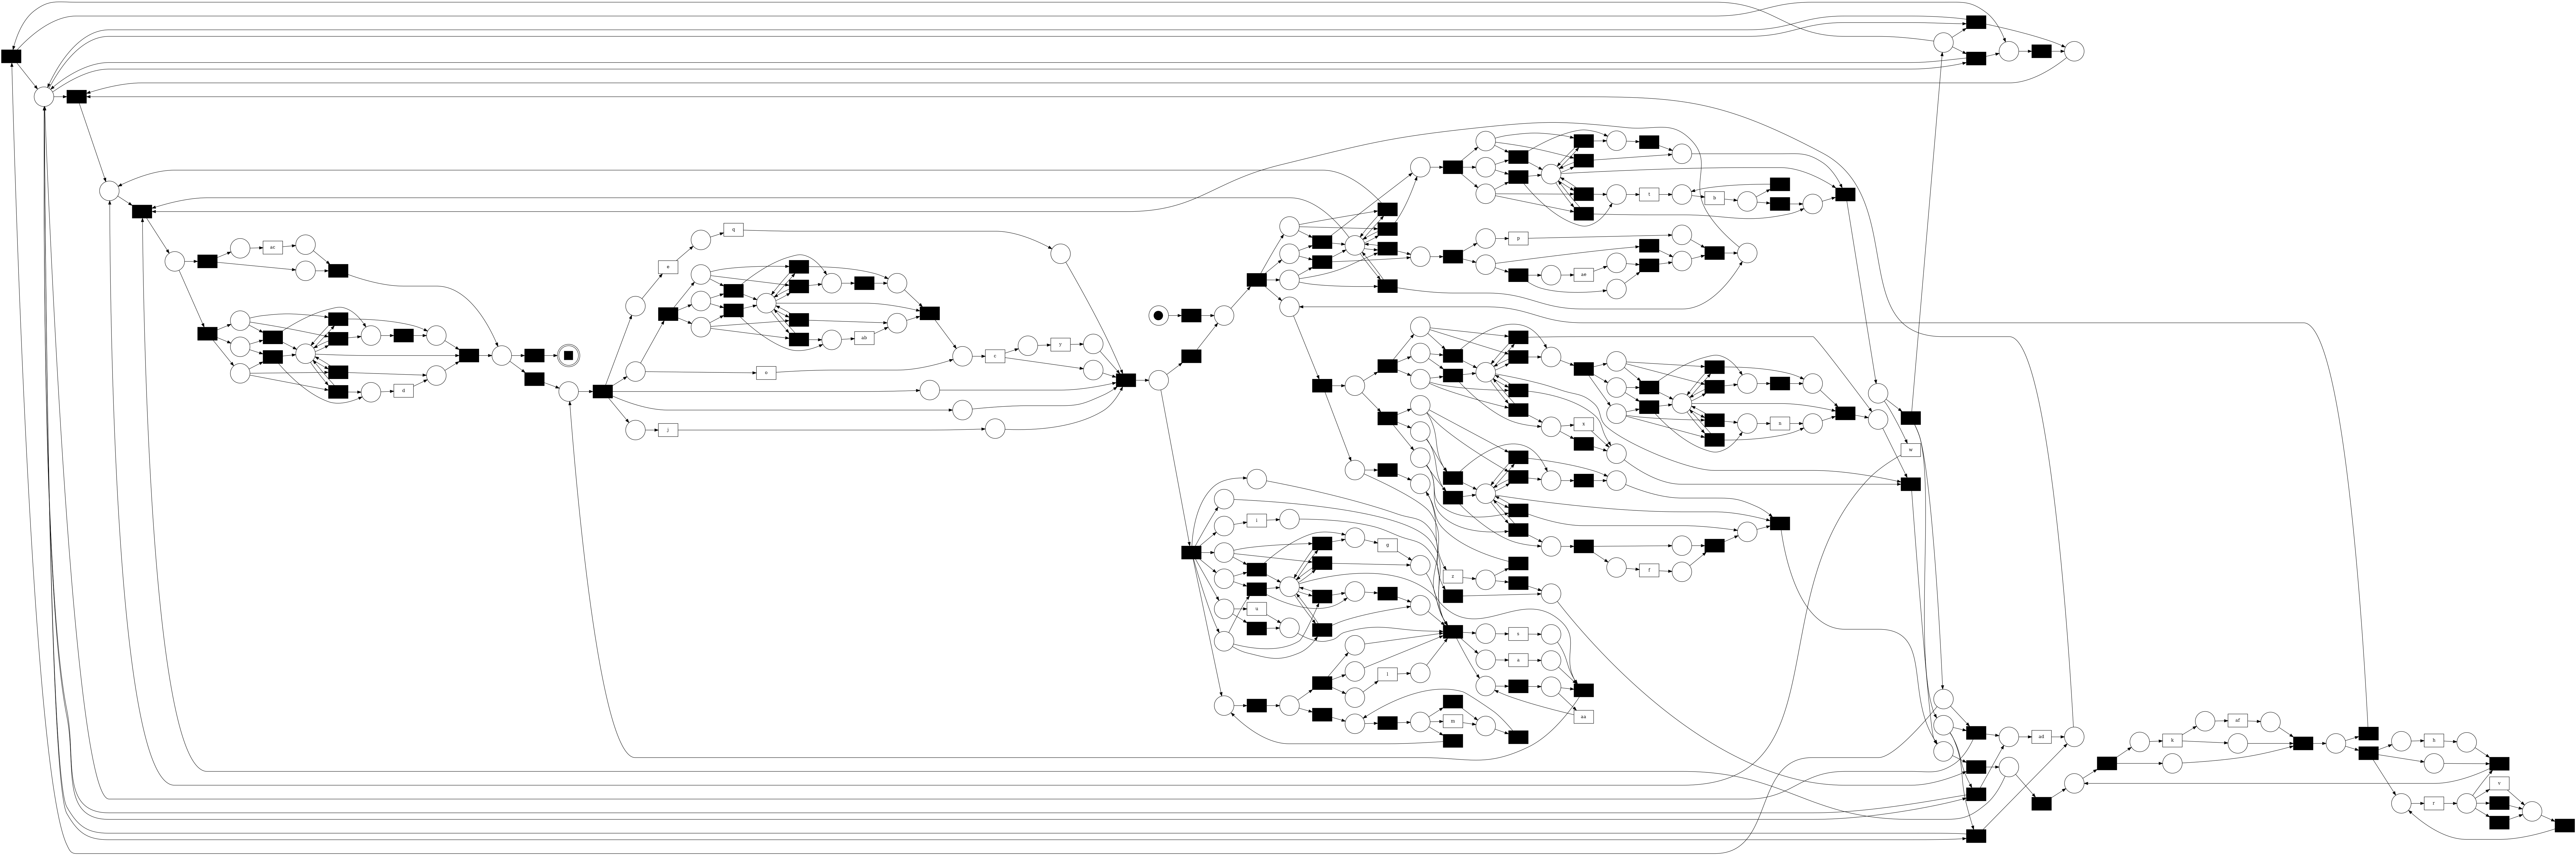

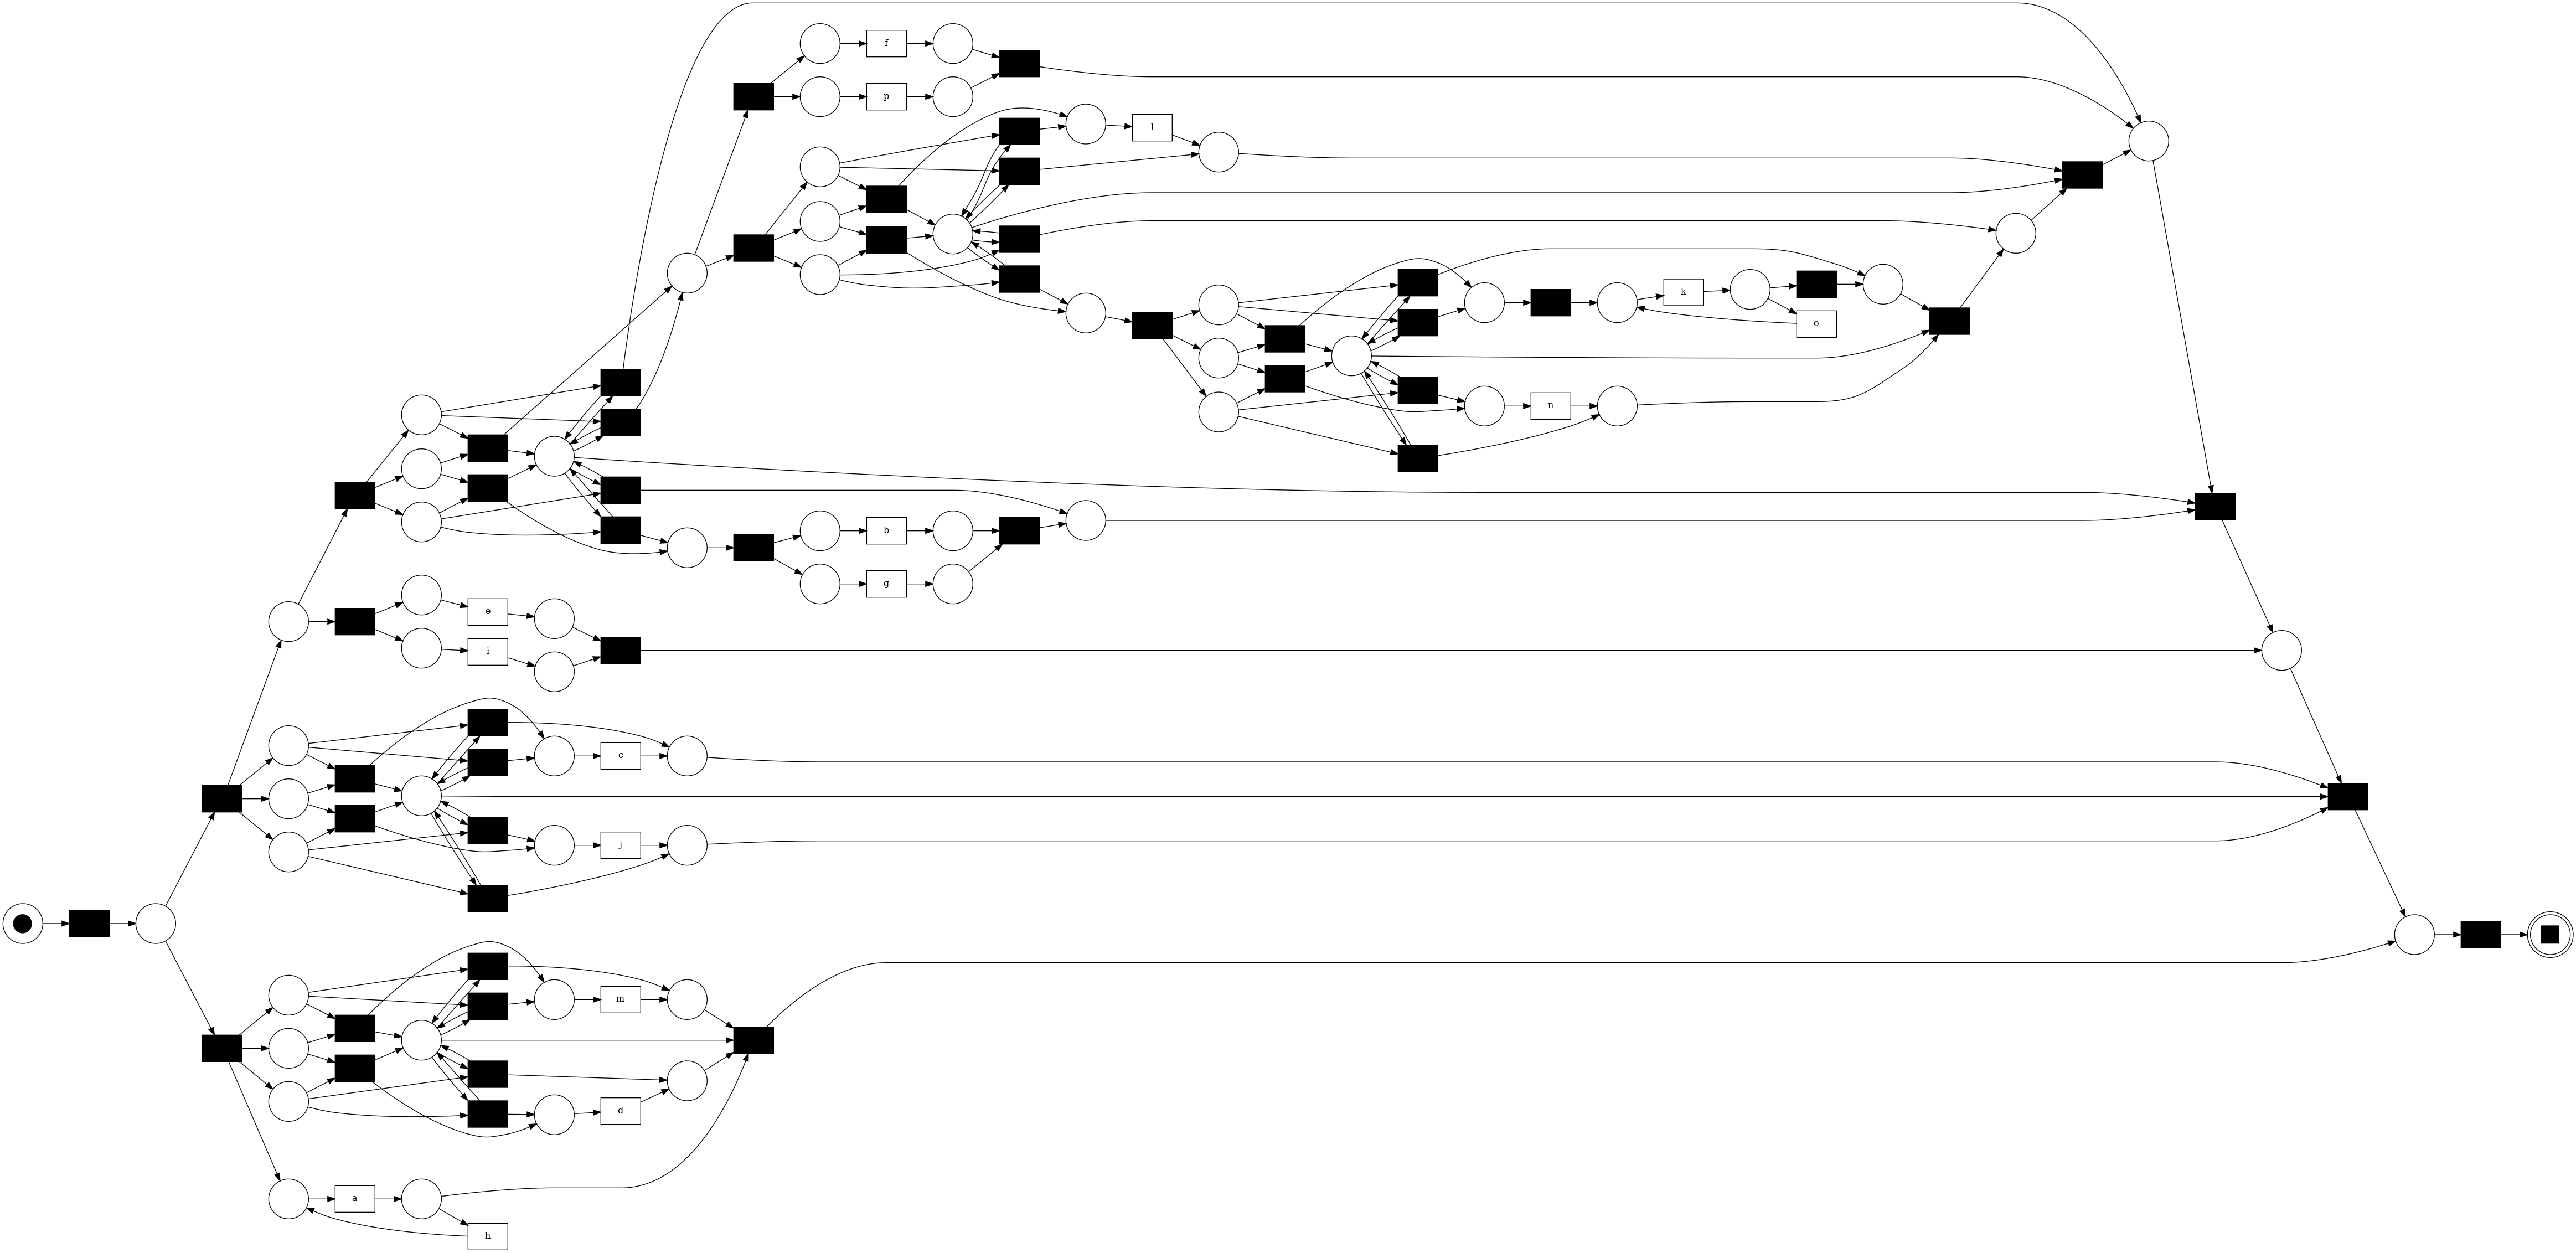

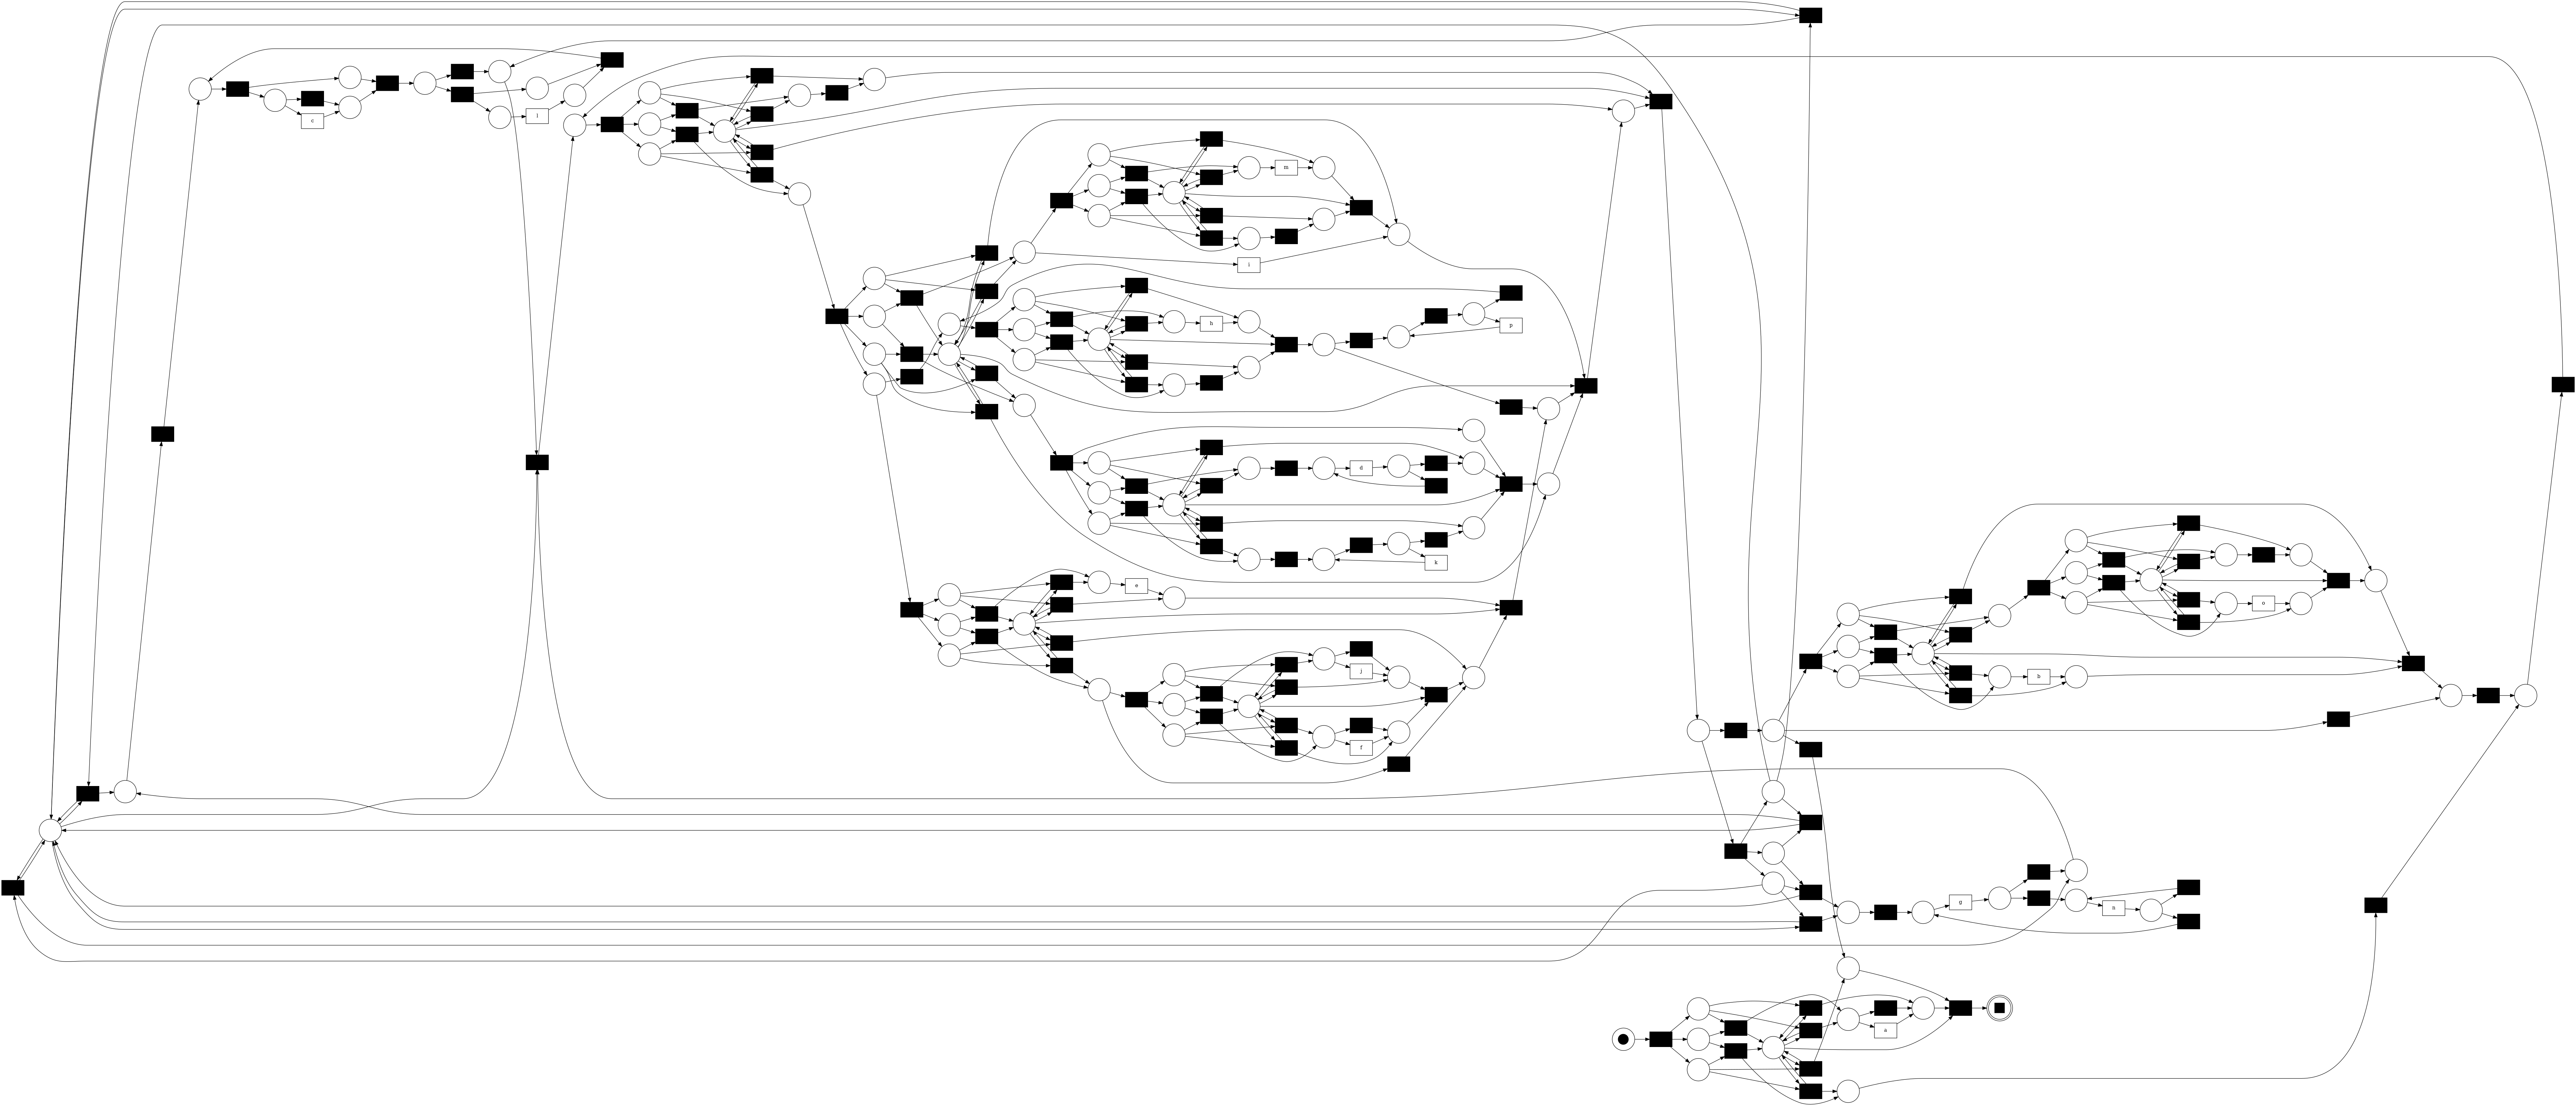

In [36]:
plot_petri_nets(selected_logs)

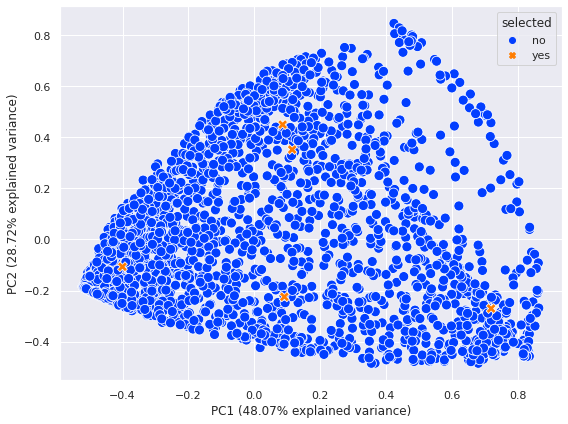

In [47]:
plot_selected_logs(df, df_pca, closest)

## Approach 2: Supervised Instance Selection

Goal: select top-n most representative event logs from the whole collection

This approach consists of defining a target/class, this way, we have a mapping between X (features describing the event logs) and y (target). 

### Variation 1

A straightforward solution is using clusters as labels. Then, we are able to rely on traditionally employed instance selection methods.

### Baseline classification performance

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer


clf = RandomForestClassifier(random_state=50, n_jobs=-1)
scores = cross_val_score(clf, df.drop(["log"], axis=1), clustering.labels_, scoring='f1_micro', cv=10, n_jobs=-1)
print(f"F1-score: {np.round(np.mean(scores), 2)} ({np.round(np.std(scores), 2)})")

F1-score: 0.78 (0.08)


### Sampling most relevant instances

In [60]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold

sampler = InstanceHardnessThreshold(
    estimator=RandomForestClassifier(n_jobs=-1), 
    sampling_strategy={0: 2, 1: 2, 2: 2, 3: 2, 4: 2}
)
X_res, y_res = sampler.fit_resample(df.drop(["log"], axis=1), clustering.labels_)

# sampler = RandomUnderSampler(sampling_strategy={0: 2, 1: 2, 2: 2, 3: 2, 4: 2})
# X_res, y_res = sampler.fit_resample(X_res, y_res)

sampled_instances = sampler.sample_indices_

print(Counter(clustering.labels_))
print(Counter(y_res))
print(X_res.shape)

Counter({0: 1022, 4: 460, 3: 418, 1: 378, 2: 228})
Counter({0: 88, 3: 58, 4: 4, 1: 3, 2: 2})
(155, 99)


In [61]:
df_ = df.copy()
df_.insert(1, "label", clustering.labels_)

X_train = df_[df_.index.isin(sampled_instances)].drop(["log", "label"], axis=1)
y_train = df_[df_.index.isin(sampled_instances)]["label"]
X_test = df_[~df_.index.isin(sampled_instances)].drop(["log", "label"], axis=1)
y_test = df_[~df_.index.isin(sampled_instances)]["label"]

clf = RandomForestClassifier(random_state=50, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Training size:", X_res.shape[0])
print("Testing size:", X_test.shape[0])
print(f"F1-score: {np.round(f1_score(y_test, y_pred, average='micro'), 2)}")

Training size: 155
Testing size: 2351
F1-score: 0.62


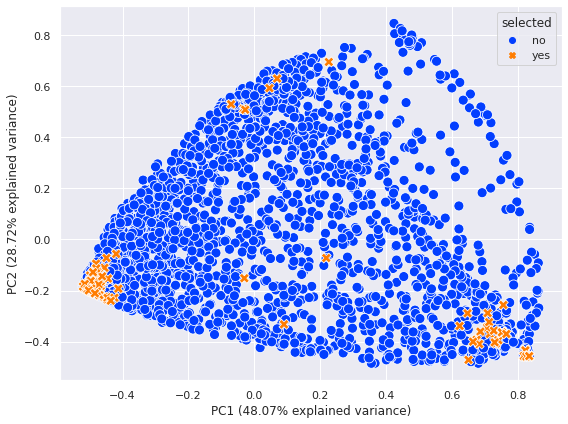

In [63]:
plot_selected_logs(df, df_pca, sampled_instances)

### Variation 2

Using one of the meta-features as targets and relying on traditionally employed instance selection methods.

In [343]:
df.columns

Index(['log', 'tree_n_sequence', 'tree_n_choice', 'tree_n_parallel',
       'tree_n_loop', 'tree_n_or', 'tree_n_silent', 'n_traces',
       'n_unique_traces', 'ratio_unique_traces_per_trace', 'n_events',
       'trace_len_min', 'trace_len_max', 'trace_len_mean', 'trace_len_median',
       'trace_len_mode', 'trace_len_std', 'trace_len_variance', 'trace_len_q1',
       'trace_len_q3', 'trace_len_iqr', 'trace_len_geometric_mean',
       'trace_len_geometric_std', 'trace_len_harmonic_mean',
       'trace_len_skewness', 'trace_len_kurtosis',
       'trace_len_coefficient_variation', 'trace_len_entropy',
       'trace_len_hist1', 'trace_len_hist2', 'trace_len_hist3',
       'trace_len_hist4', 'trace_len_hist5', 'trace_len_hist6',
       'trace_len_hist7', 'trace_len_hist8', 'trace_len_hist9',
       'trace_len_hist10', 'trace_len_skewness_hist',
       'trace_len_kurtosis_hist', 'ratio_most_common_variant',
       'ratio_top_1_variants', 'ratio_top_5_variants', 'ratio_top_10_variants',
     

In [345]:
from sklearn.ensemble import RandomForestRegressor

sampler = InstanceHardnessThreshold(estimator=RandomForestRegressor(n_jobs=-1), sampling_strategy={0: 2, 1: 2, 2: 2, 3: 2, 4: 2})
X_res, y_res = sampler.fit_resample(df.drop(["log", "entropy_global_block"], axis=1), df["entropy_global_block"])
sampled_instances = sampler.sample_indices_

print(Counter(clustering.labels_))
print(Counter(y_res))
print(X_res.shape)

InvalidParameterError: The 'estimator' parameter of InstanceHardnessThreshold must be an object implementing 'fit' and 'predict_proba' or None. Got RandomForestRegressor(n_jobs=-1) instead.

**Next steps / Open challenges**

- [ ] Choose the set of operator probabilities
- [ ] Define hyperparameters
	- [ ] number of activities
	- [ ] number of traces
	- [ ] silent / lt_dependency / infrequent
- [ ] Inject anomalies (which types, combinations and percentages)
- [ ] Include new descriptive features, mainly for process tree and petri net
- [ ] Inject specific behavior?
- [ ] How to grade complexity? Combine meta-features? Formalize it?
- [ ] How to deal with scaling combinations? How many models/event logs to generate?
- [ ] What about data-flow attributes?
- [ ] How to sample a small descriptive set of log behaviors?

**Possible steps**
- [X] Study dataset distillation/instance selection
- [ ] Overleaf project
- [ ] Approach 1: Follow the clustering approach to select the top-n datasets
- [ ] Approach 2: Try to select and apply a "target" and apply supervised instance selection
- [ ] Identify candidate datasets for both approaches and test them on traditional PM tasks
- [ ] Benchmark traditional algorithms for baseline performances

